In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/91865/Downloads/sms_spam (1).csv")

In [3]:
df.sample(5)


,type,text
4165,ham,"Its ok, called mom instead have fun"
878,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4616,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
4192,ham,"Each Moment in a day,has its own value-Morning..."
4176,ham,How are you doing. How's the queen. Are you go...


In [4]:
df.shape

(5577, 2)

In [5]:
# step to do the project
# 1.data cleaning
# 2.EDA
# 3.Text preproccesing
# 4.model building
# 5.evaluation
# 6.improvement
# 7.website
# 8.deploy


# DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5577 non-null   object
 1   text    5576 non-null   object
dtypes: object(2)
memory usage: 87.3+ KB


In [7]:
#check null or not
df.isnull().sum()



type    0
text    1
dtype: int64

In [8]:
df.isnull()

,type,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5572,False,False
5573,False,False
5574,False,False
5575,False,False


In [9]:
df.dropna(inplace=True)#we have one null value so we use  dropna  to remove it

In [10]:
df.shape

(5576, 2)

In [11]:
#check dupilcate
df.duplicated().sum()

414

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['type'])
df


,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...
5573,0,Rofl. Its true to its name
5574,1,A [redacted] loan for Rs.95000 is approved for...


In [13]:
#drop the dupicate value
df=df.drop_duplicates()
df.head()


,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()
df.duplicated().sum()

0

In [15]:
df.shape

(5162, 2)

In [16]:
df.rename(columns={"type":"target"},inplace=True)

C:\Users\91865\AppData\Local\Temp\ipykernel_4660\1290435967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"type":"target"},inplace=True)


# EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4518
1     644
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

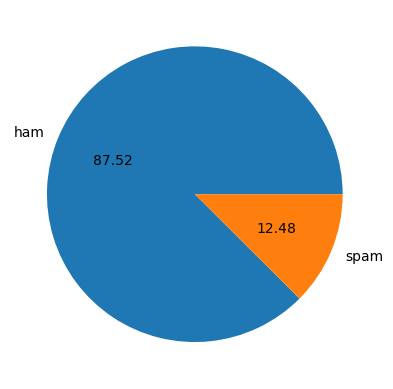

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# data is imbalanced

In [21]:

import nltk

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91865\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91865\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
#we find len of each character and assine in a new column as num_char
df['num_char']=df['text'].apply(len)
df.head()

C:\Users\91865\AppData\Local\Temp\ipykernel_4660\1350012549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#we have to find the len of word and assine in a new column as num_word
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\91865\AppData\Local\Temp\ipykernel_4660\2128130852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#we have to find the len of sentence and assine in a new column as num_sentence
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\91865\AppData\Local\Temp\ipykernel_4660\549879686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:

df[['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,5162.000000,5162.000000,5162.000000
mean,79.145099,18.589113,1.970748
std,58.292916,13.397443,1.455707
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham
df[df['target']==0][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,4518.000000,4518.000000,4518.000000
mean,70.860558,17.289951,1.827579
std,56.584422,13.579652,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target']==1][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,644.000000,644.000000,644.000000
mean,137.265528,27.703416,2.975155
std,30.275654,7.083852,1.482717
min,13.000000,2.000000,1.000000
25%,130.750000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


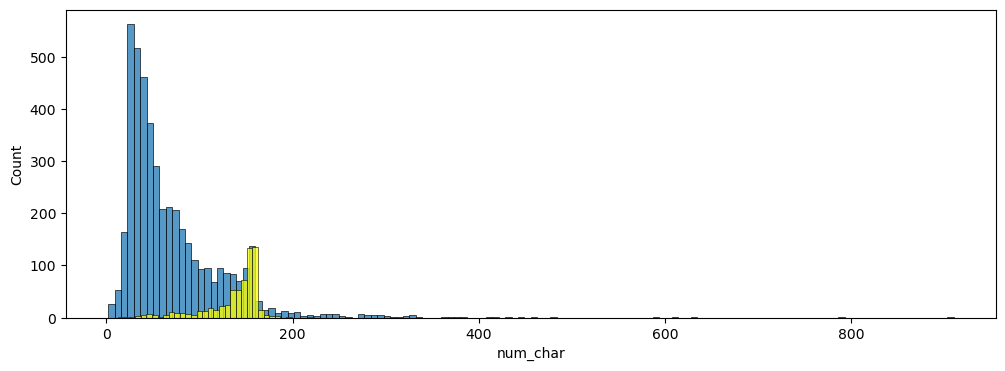

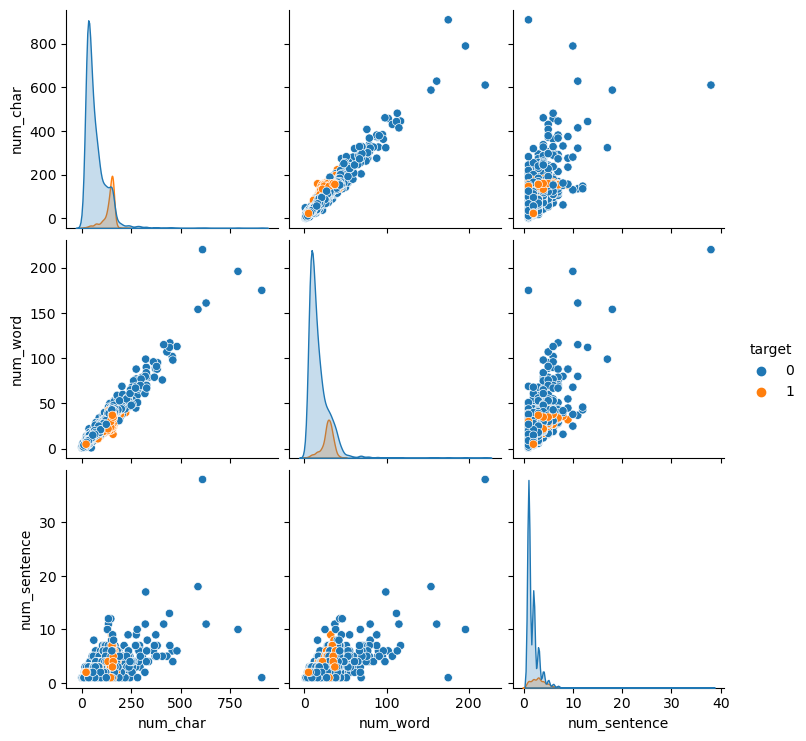

In [30]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='yellow')
sns.pairplot(df,hue='target')

In [31]:
df.corr()

,target,num_char,num_word,num_sentence
target,1.000000,0.376465,0.256870,0.260524
num_char,0.376465,1.000000,0.966064,0.623129
num_word,0.256870,0.966064,1.000000,0.679736
num_sentence,0.260524,0.623129,0.679736,1.000000


<AxesSubplot:>

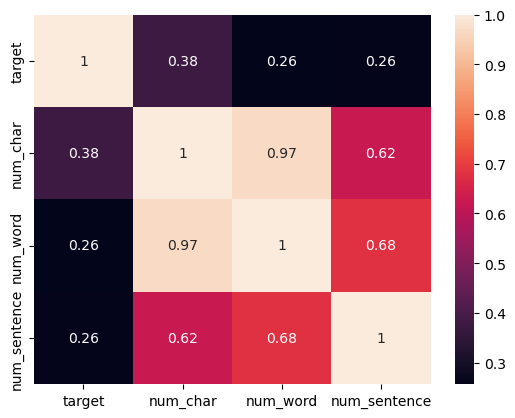

In [32]:
sns.heatmap(df.corr(),annot=True)

# data preproceing
<!-- lower case
removing special characters
removing stop words and punctuation
streamming -->

In [33]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
import nltk
ps=PorterStemmer()
def filter_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    ft=[]
    for i in text:
        if i.isalnum():
            ft.append(i)
    text=ft[:]#or we can use ft.copy()
    ft.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            ft.append(i)
    text=ft.copy()
    ft.clear()
    for i in text:
        ft.append(ps.stem(i))
    return " ".join(ft)

In [34]:
filter_text('HI are yOU THERe')

'hi'

In [35]:
df['text'][2000]

"LMAO where's your fish memory when I need it?"

In [36]:
df['filtered_text']=df['text'].apply(filter_text)
df.head()


C:\Users\91865\AppData\Local\Temp\ipykernel_4660\3875506819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_text']=df['text'].apply(filter_text)


,target,text,num_char,num_word,num_sentence,filtered_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
#pip install --upgrade pillow
#install wordclod and pillow and also upgrade it

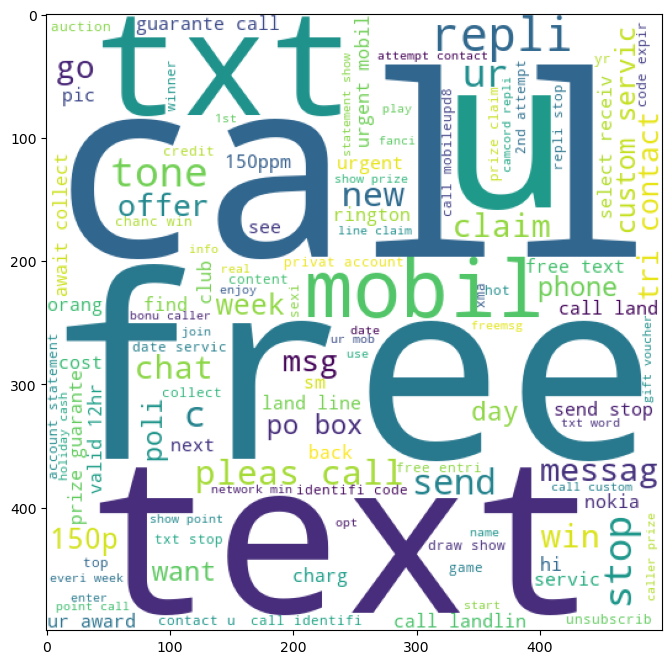

In [38]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['filtered_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)




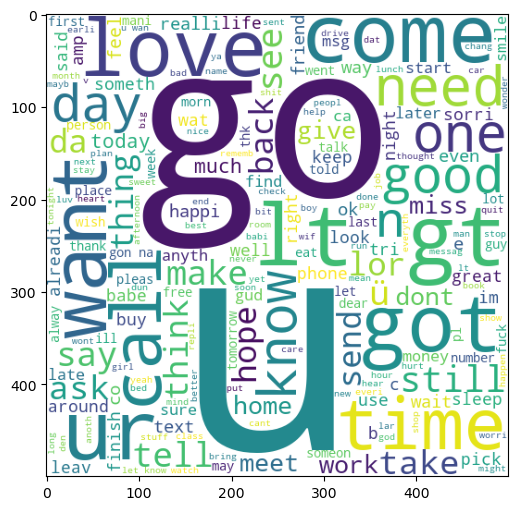

In [39]:
ham_wc=wc.generate(df[df['target']==0]['filtered_text'].str.cat(sep=""))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [40]:
#to find spam word
spam_corpus=[]
for msg in df[df['target']==1]['filtered_text'].tolist():
   for word in msg.split():
    spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [41]:
len(spam_corpus)

9827

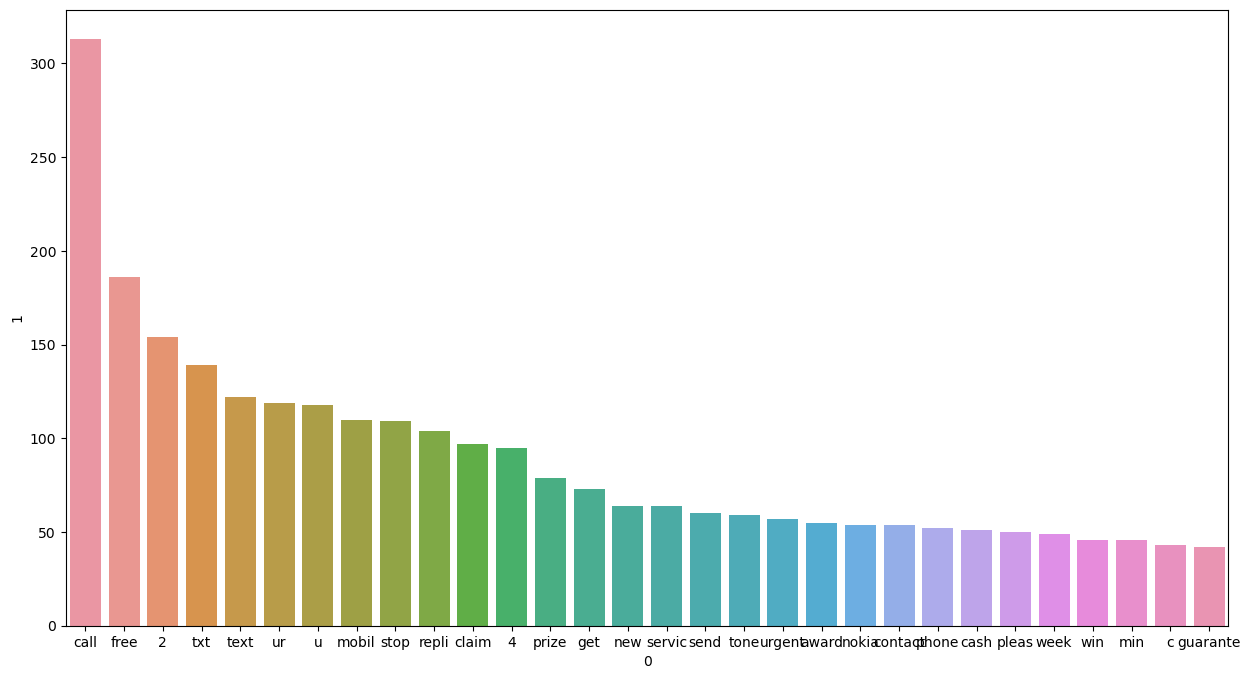

In [42]:
#bar plot of top 30 word of spam message
from collections import Counter
pdf=pd.DataFrame(Counter(spam_corpus).most_common(30))
#pdf
plt.figure(figsize=(15,8))
sns.barplot(x=0,y=1,data=pdf)
plt.show()

In [43]:
#similarly for ham
ham_corpus=[]
for msg in df[df['target']==0]['filtered_text'].tolist():
   for word in msg.split():
    ham_corpus.append(word)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

<AxesSubplot:xlabel='0', ylabel='1'>

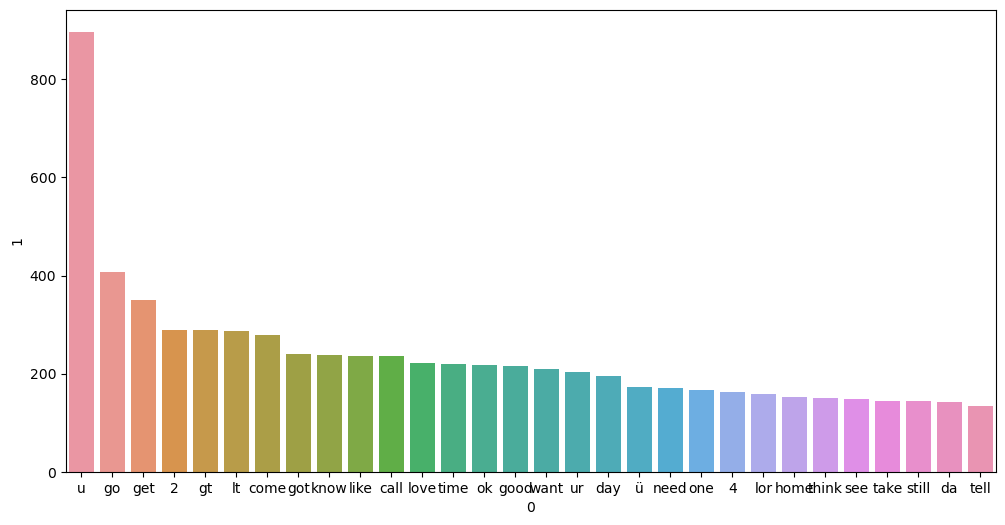

In [44]:
#  barplot for top 30 word in ham
pdf=pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(x=0,y=1,data=pdf)

# model building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
cv=CountVectorizer()
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['filtered_text']).toarray()
y=df['target'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.metrics import accuracy_score,precision_score

In [47]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [48]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8818973862536302
0.5069124423963134


In [49]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.957405614714424
1.0


In [50]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9651500484027106
0.9405940594059405


In [51]:
#pip install xgboost

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [54]:
def best_Algo(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    return accuracy_score(y_test,y_pred),precision_score(y_test,y_pred)

In [55]:

clfs={
    'svc':svc,
    'mnb':mnb,
    'knn':knn,
    'dtc':dtc,
    'abc':abc,
    'rfc':rfc,
    'bc':bc,
    'etc':etc,
    'gbc':gbc,
    'xgb':xgb
}

In [56]:
name,acc,prec=[],[],[]
for nm,clf in clfs.items():
    name.append(nm)
    accuracy,precision=best_Algo(clf,x_train,x_test,y_train,y_test)
    acc.append(accuracy)
    prec.append(precision)
d = {'name':name,'accuracy':acc,'precision':prec}
clf_df=pd.DataFrame(d)
clf_df

,name,accuracy,precision
0,svc,0.968054,0.960000
1,mnb,0.957406,1.000000
2,knn,0.907067,1.000000
3,dtc,0.939013,0.792453
4,abc,0.953533,0.888889
5,rfc,0.966118,0.989130
6,bc,0.960310,0.875000
7,etc,0.970958,0.989691
8,gbc,0.947725,0.949367
9,xgb,0.964182,0.931373


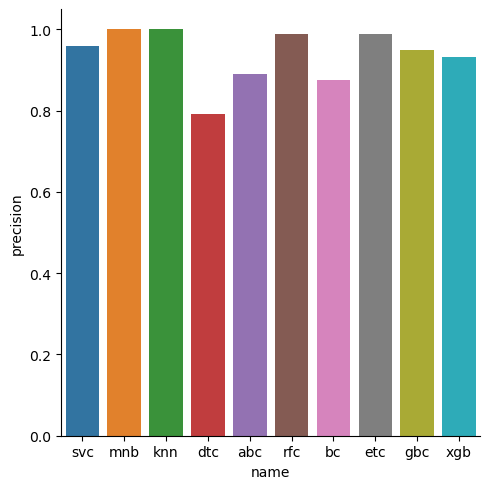

In [57]:
sns.catplot(x='name',y='precision',data=clf_df,kind='bar',height=5)

In [58]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('mnb',mnb),('knn',knn),('rfc',rfc)])

In [59]:
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9564375605033882
1.0


In [60]:
estimators=[('mnb',mnb),('knn',knn),('rfc',rfc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [61]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred))

0.9748305905130688 0.9159663865546218


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [63]:
clf=pickle.load(open("vectorizer.pkl","rb"))

In [64]:
clf

TfidfVectorizer()

In [65]:
clf=pickle.load(open('model.pkl','rb'))

In [66]:
clf

MultinomialNB()